#### importing necessary packages

In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [4]:
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, Activation,
                          Flatten, Dropout, Dense)
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical

In [6]:
root = '../dataset-resized/'

In [13]:
classes_ = os.listdir(os.path.join(root, 'train'))

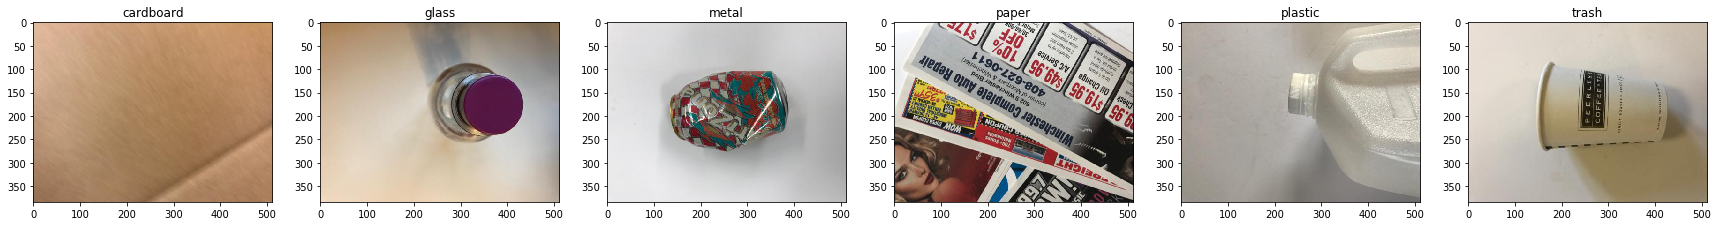

In [17]:
fig = plt.figure(figsize=(30,15))

for i,c in enumerate(classes_):
    r = random.randint(0, len(os.listdir(os.path.join(root, 'train', c))))
    fig.add_subplot(1, 6, i+1)
    plt.imshow(load_img(os.path.join(root, 'train', c, os.listdir(os.path.join(root, 'train', c))[r])))
    plt.title(c)
plt.show()

In [18]:
test_img = load_img(os.path.join(root, 'train', classes_[0], os.listdir(os.path.join(root,'train', classes_[0]))[0]))
height_, width_, depth_ = np.array(test_img).shape[0], np.array(test_img).shape[1], np.array(test_img).shape[2]

In [19]:
print('---Image Shape--- \n height: {} \n width: {} \n depth: {}'.format(height_, width_, depth_))

---Image Shape--- 
 height: 384 
 width: 512 
 depth: 3


In [20]:
def class_count_pie(root):
    
    
    
    classes_ = os.listdir(os.path.join(root, 'train')) 

    class_count = {} # class count dict

    for c in classes_:
        for t_img in os.listdir(os.path.join(root, 'train', c)):
            if c not in class_count:
                class_count[c]=0
            else:
                class_count[c]+=1   
    
    class_count = pd.DataFrame.from_dict(class_count, orient='index')
    plt.pie(class_count, labels=list(class_count.index))
    
    return class_count

,0
trash,115
metal,389
paper,573
cardboard,382
plastic,461
glass,479


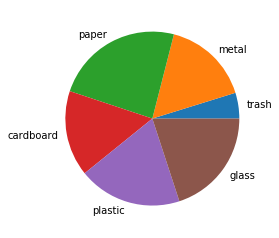

In [21]:
class_count_pie(root)

In [22]:
def get_image_dim(img_idx=0):
    '''
    returns the height, width & depth of first image
    '''
    first_class_path = os.path.join(root, os.listdir(root)[img_idx])
    first_image_path = os.path.join(first_class_path, os.listdir(first_class_path)[img_idx])
    first_img = img_to_array(load_img(first_image_path))

    return first_img.shape[0], first_img.shape[1], first_img.shape[2]

In [39]:
### loading images into a numpy array
def load_images(filepath=root):
    
    classes_ = os.listdir(os.path.join(filepath)) # classes dir

    class_count = {} # class count dict
    
    X = []
    
    y = []

    for c in classes_: # iterating over classes 
        for c_img in os.listdir(os.path.join(filepath, c)): # iterate over each class image
            # load image
            t_img = plt.imread(
                        os.path.join(
                            filepath, c, c_img))
            
            X.append(t_img)
            y.append(c)
            
        print(c, 'is loaded')

    return np.array(X),y

In [40]:
X,y = load_images(filepath=os.path.join(root,'train'))

cardboard is loaded
glass is loaded
metal is loaded
paper is loaded
plastic is loaded
trash is loaded


In [ ]:
# label encoding the image names
enc = LabelEncoder()
# converting the labels to categorical for training
y = to_categaorical(enc.fit_transform(y)) 

In [ ]:
# Vaidation Data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [ ]:
input_shape = get_image_dim()
type(input_shape)

#### MODEL

In [ ]:
def model(img_shape):
    
    model = Sequential()
    
    # first conv-max-pool layer
    model.add(Conv2D(64, (3, 3), input_shape=img_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # second conv-max-pool layer
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # third conv-max-pool layer
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # flatten
    model.add(Flatten())
    
    # hidden layer
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    # 
    model.add(Dense(6))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.0001),
                  metrics=['accuracy'])
    return model

In [ ]:
get_image_dim()

In [357]:
IMAGE_SHAPE =  

In [358]:
model = model(img_shape=IMAGE_SHAPE)

In [359]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [360]:
image_generator = datagen.flow_from_directory(root, target_size=IMAGE_SHAPE[:-1], batch_size=32)

Found 2527 images belonging to 6 classes.


In [361]:
BATCH_SIZE = 32
EPOCHS = 5
STEPS_PER_EPOCH = int(image_generator.n / image_generator.batch_size)

In [362]:
model.fit_generator(image_generator, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS)

Epoch 1/5
78/78 [==============================] - 21s 267ms/step - loss: 0.4843 - acc: 0.8094
Epoch 2/5
78/78 [==============================] - 18s 236ms/step - loss: 0.4378 - acc: 0.8238
Epoch 3/5
78/78 [==============================] - 18s 236ms/step - loss: 0.4170 - acc: 0.8285
Epoch 4/5
78/78 [==============================] - 19s 238ms/step - loss: 0.4038 - acc: 0.8341
Epoch 5/5
78/78 [==============================] - 20s 255ms/step - loss: 0.4017 - acc: 0.8317
